##Naive Bayes Classification:
Import weight data and fit Naive Bayes model to the data.  Predict new weights.

In [1]:
ls

2015-09-09_train_test_split.ipynb  2015-10-04_randomforests.ipynb     UCI HAR Dataset/                   random_forest.py
2015-09-13_overfitting.py.ipynb    2015-10-09_Naive_Bayes.ipynb       UCI HAR Dataset.zip                sampleData.csv
2015-09-17_cross_validation.ipynb  README.md                          ideal_weight.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [5]:
df = pd.read_csv('ideal_weight.csv')

In [8]:
df.head()

,'id','sex','actual','ideal','diff'
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10


In [10]:
df.columns

Index([u''id'', u''sex'', u''actual'', u''ideal'', u''diff''], dtype='object')

In [12]:
df.columns = ["ID","SEX","ACTUAL","IDEAL","DELTA"]

In [17]:
df['SEX'] = df["SEX"].map(lambda x: x[1:-1])

In [22]:
#Data should now be cleaned:
df.head()

,ID,SEX,ACTUAL,IDEAL,DELTA
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10


In [25]:
#Let's set index to be the individual IDs:
df.set_index("ID",inplace=True)

In [27]:
#Check the data before going ahead:
df.head()

,SEX,ACTUAL,IDEAL,DELTA
ID,,,,
0,Male,215,190,25
1,Female,155,135,20
2,Male,195,155,40
3,Female,145,130,15
4,Female,110,100,10


In [30]:
df.describe()

,ACTUAL,IDEAL,DELTA
count,182.000000,182.000000,182.000000
mean,147.774725,139.950549,7.824176
std,30.317269,29.750580,12.759651
min,90.000000,85.000000,-35.000000
25%,125.000000,120.000000,0.000000
50%,140.000000,130.000000,7.000000
75%,170.000000,164.500000,11.000000
max,235.000000,225.000000,55.000000


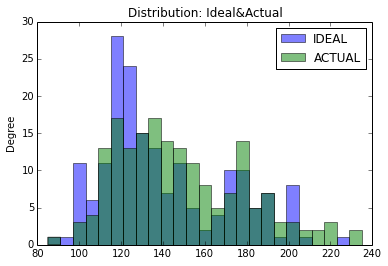

In [45]:
%matplotlib inline
df[["IDEAL","ACTUAL"]].plot(kind='hist',bins=25,alpha=0.5,title="Distribution: Ideal&Actual",)

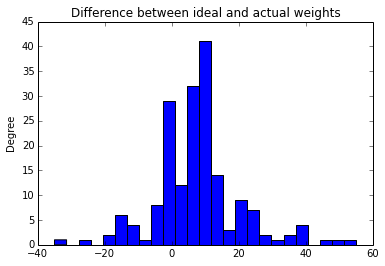

In [47]:
df["DELTA"].plot(kind='hist',bins=25,title="Difference between ideal and actual weights")

##Fight a Gaussian Naive Bayes Classifier
Predict sex from ideal, actual and delta weights.

In [57]:
#Split data into features and labels:
X = df[["IDEAL","ACTUAL","DELTA"]]
y = df["SEX"]
#Instantiate and fit the model:
gNB = sklearn.naive_bayes.GaussianNB()
gNB.fit(X,y)

GaussianNB()

In [62]:
#Check score:
gNB.score(X,y)

0.92307692307692313

In [70]:
#Construct confusion matrix:
predictions = pd.Series(gNB.predict(X))
confusion_matrix = sklearn.metrics.confusion_matrix(y,predictions)
confusion_matrix

array([[112,   7],
       [  7,  56]])

112 females classified correctly.
7 females classified as males.
56 males classified correctly.
7 males classified as females.
14 mistakes in total.

<matplotlib.colorbar.Colorbar instance at 0x1163c4c68>

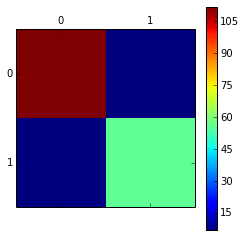

In [72]:
#Vis confusion matrix:
plt.matshow(confusion_matrix)
plt.colorbar()

In [59]:
#Predict AW:145,IW:160,D -15
gNB.predict([160,145,-15])

array(['Male'], 
      dtype='<S6')

In [60]:
#Predict AW:160,IW:145,D+15
gNB.predict([145,160,15])

array(['Female'], 
      dtype='<S6')

In [80]:
#Confirm the number of males and females in the dataset:
#Males
df["SEX"].str.contains("Male").sum()

63

In [90]:
#Females:
df["SEX"].str.contains("Female").sum()

119

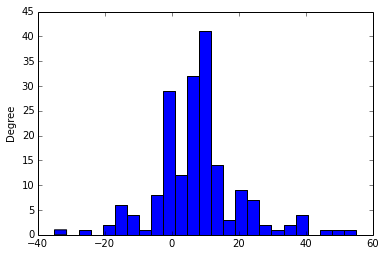

In [84]:
#Check out distribution of delta:
df["DELTA"].plot(kind="hist",bins=25)

In [99]:
#Calculate number of people overweight by more than 35 pounds:
df["DELTA"][df["DELTA"] > 35].count()

7

119